# Kaggle Dataset Competition
## House Prices - Advanced Regression Techniques (Top 8%)

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
train_df = pd.read_csv('train.csv' ,index_col='Id')
test_df = pd.read_csv('test.csv' , index_col = 'Id')
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [4]:
print("Training data: {}".format(train_df.shape))
print("Testing  data: {}".format(test_df.shape))

Training data: (1460, 80)
Testing  data: (1459, 79)


In [5]:
train_df.isna().mean()

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [6]:
test_df.isna().mean()

MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
Street           0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000685
SaleCondition    0.000000
Length: 79, dtype: float64

In [7]:
#Since the test data also has null values, both the sets of data is concatenated

final_df = pd.concat([train_df , test_df] , axis =0 , sort = False)
final_df.drop('SalePrice' , axis = 1 ,inplace = True)
final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
final_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Feature Engineering

In [9]:
#Analysing the columns with null values

null_df = pd.DataFrame(final_df.isna().mean() , columns =['%count']).sort_values(by = '%count' , ascending = False)
null_df = null_df[null_df['%count']!=0]
null_df

,%count
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
FireplaceQu,0.486468
LotFrontage,0.166495
GarageYrBlt,0.054471
GarageFinish,0.054471
GarageQual,0.054471
GarageCond,0.054471


<AxesSubplot:xlabel='%count'>

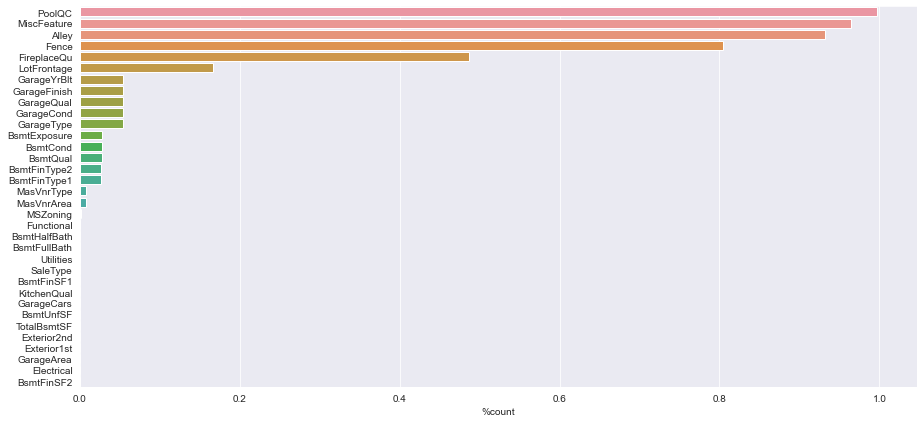

In [10]:
### Bar graph of null values in the features 

sns.set_style('darkgrid')

plt.figure(figsize = (15, 7))
sns.barplot(x = null_df['%count'] , y = null_df.index)

<AxesSubplot:ylabel='Id'>

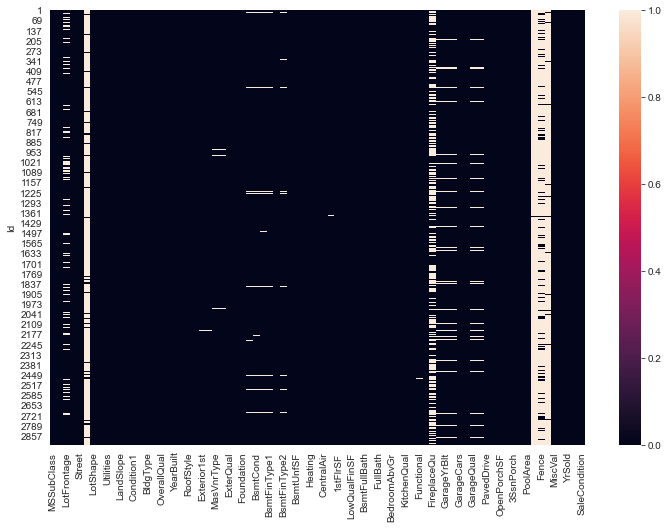

In [11]:
### Heatmap of null values

plt.figure(figsize= (12,8))
sns.heatmap(final_df.isna())

In [12]:
null_df.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'Functional', 'BsmtHalfBath',
       'BsmtFullBath', 'Utilities', 'SaleType', 'BsmtFinSF1', 'KitchenQual',
       'GarageCars', 'BsmtUnfSF', 'TotalBsmtSF', 'Exterior2nd', 'Exterior1st',
       'GarageArea', 'Electrical', 'BsmtFinSF2'],
      dtype='object')

In [13]:
# dropping 'PoolQC', 'MiscFeature', 'Alley', 'Fence' since they have more than 80% null values

final_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'] ,axis =1 , inplace = True)
train_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'] ,axis =1 , inplace = True)

In [14]:
final_df.shape

(2919, 75)

In [15]:
final_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [16]:
#Analysing the columns with null values

null_df = pd.DataFrame(final_df.isna().sum()/final_df.shape[0] , columns =['%count']).sort_values(by = '%count' , ascending = False)
null_df = null_df[null_df['%count']!=0]
null_df

,%count
FireplaceQu,0.486468
LotFrontage,0.166495
GarageQual,0.054471
GarageFinish,0.054471
GarageCond,0.054471
GarageYrBlt,0.054471
GarageType,0.053786
BsmtCond,0.028092
BsmtExposure,0.028092
BsmtQual,0.027749


In [17]:
corr_matrix = train_df.corr()

In [18]:
### Fetching the categorical and numeric columns

numeric_cols = [i for i in corr_matrix.columns if i!= "SalePrice"]
categorical_cols = [i for i in final_df.columns if i not in numeric_cols and i!="SalePrice"]

print("Categorical Columns: {} ".format(len(categorical_cols)))
print("Numeric Columns: {} ".format(len(numeric_cols)))

Categorical Columns: 39 
Numeric Columns: 36 


### 1.Missing values in Categorical Columns

In [19]:
### Categorical features that have null values

category_null_df = pd.DataFrame(final_df[categorical_cols].isna().mean(), columns =['%count']).sort_values(by = '%count' , ascending = False)
category_null_df = category_null_df[category_null_df['%count']!=0]
category_null_df

,%count
FireplaceQu,0.486468
GarageCond,0.054471
GarageQual,0.054471
GarageFinish,0.054471
GarageType,0.053786
BsmtExposure,0.028092
BsmtCond,0.028092
BsmtQual,0.027749
BsmtFinType2,0.027407
BsmtFinType1,0.027064


In [20]:
### count of features for every categorical column

for i in categorical_cols:
    print("{} : {}".format(i , final_df[i].value_counts().shape[0]))

MSZoning : 5
Street : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
FireplaceQu : 5
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
SaleType : 9
SaleCondition : 6


In [21]:
# some places might not have fireplaces
final_df['FireplaceQu'].fillna('NA' , inplace = True)

# Fill NA hor houses that dont have garage
for column in ['GarageCond' , 'GarageType' , 'GarageQual'  , 'GarageFinish']:
    final_df[column].fillna('NA' , inplace = True)
    
for column in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    final_df[column].fillna(0 , inplace = True)
    
# For houses that have a basement fill NA based on the description
for column in ['BsmtExposure','BsmtFinType1' ,'BsmtFinType2' , 'BsmtQual' , 'BsmtCond']:
    final_df[column].fillna('NA' , inplace = True)
    
# Masonry veneer type as None
final_df['MasVnrType'].fillna('None' , inplace =True)
final_df['MasVnrArea'].fillna(0, inplace = True)

# fill MsZoning with the most frequent category
final_df['MSZoning'].fillna(final_df['MSZoning'].mode()[0] , inplace =True)

# fill Functional with the most frequent category
final_df['Functional'].fillna(final_df['Functional'].mode()[0] , inplace =True)

#Utilities has imbalanced categories, won't help in predictive modelling
final_df.drop('Utilities' , axis =1 , inplace =True)

# fill with the most frequent category since the have only one missing value
final_df['Electrical'].fillna(final_df['Electrical'].mode()[0] , inplace =True)
final_df['Exterior1st'].fillna(final_df['Exterior1st'].mode()[0] , inplace =True)
final_df['Exterior2nd'].fillna(final_df['Exterior2nd'].mode()[0] , inplace =True)
final_df['SaleType'].fillna(final_df['SaleType'].mode()[0] , inplace =True)
final_df['KitchenQual'].fillna(final_df['KitchenQual'].mode()[0] , inplace =True)

In [22]:

### Categorical features that have null values
categorical_cols.remove('Utilities')
category_null_df = pd.DataFrame(final_df[categorical_cols].isna().mean(), columns =['%count']).sort_values(by = '%count' , ascending = False)
category_null_df = category_null_df[category_null_df['%count']!=0]
category_null_df

,%count


### 2. Missing values in numeric columns

In [23]:
### Numeric features that have null values

numeric_null_df = pd.DataFrame(final_df[numeric_cols].isna().mean(), columns =['%count']).sort_values(by = '%count' , ascending = False)
numeric_null_df = numeric_null_df[numeric_null_df['%count']!=0]
numeric_null_df['%count']*100

LotFrontage     16.649538
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
BsmtUnfSF        0.034258
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
TotalBsmtSF      0.034258
Name: %count, dtype: float64

<AxesSubplot:>

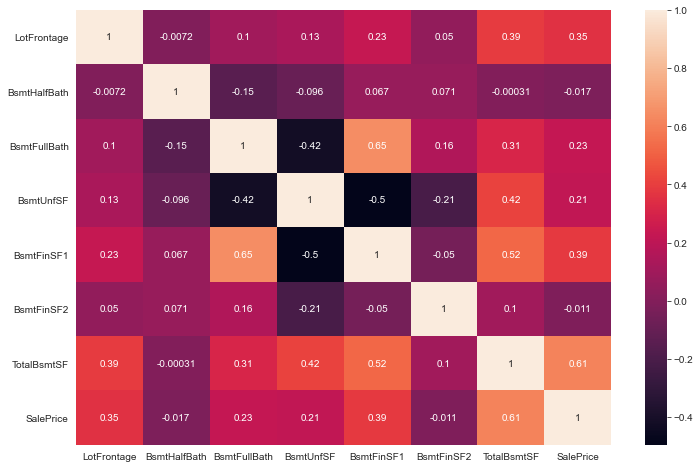

In [24]:
all_nums = numeric_null_df.index.to_list()
all_nums.append('SalePrice')

plt.figure(figsize = (12,8))
sns.heatmap(train_df[all_nums].corr() , annot = True)

In [25]:
train_df[all_nums].corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
TotalBsmtSF     0.613581
BsmtFinSF1      0.386420
LotFrontage     0.351799
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
Name: SalePrice, dtype: float64

C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

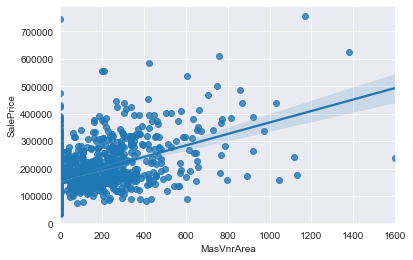

In [26]:
sns.regplot(train_df['MasVnrArea'] , train_df['SalePrice'])

In [27]:
final_df.shape

(2919, 74)

In [28]:
### Numeric features that have null values

numeric_null_df = pd.DataFrame(final_df[numeric_cols].isna().mean(), columns =['%count']).sort_values(by = '%count' , ascending = False)
numeric_null_df = numeric_null_df[numeric_null_df['%count']!=0]
numeric_null_df['%count']*100

LotFrontage     16.649538
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
BsmtUnfSF        0.034258
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
TotalBsmtSF      0.034258
Name: %count, dtype: float64

In [29]:
final_df['LotFrontage'].groupby(final_df['Neighborhood']).median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [30]:
## Since no basement is present fill 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    final_df[col].fillna(0 , inplace = True)

In [31]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
final_df["LotFrontage"] = final_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [32]:
numeric_null_df = pd.DataFrame(final_df[numeric_cols].isna().sum(), columns =['%count']).sort_values(by = '%count' , ascending = False)
numeric_null_df = numeric_null_df[numeric_null_df['%count']!=0]
numeric_null_df

,%count


In [33]:
final_df.isna().sum().sum()

0

## Feature Selection

In [34]:
main_df = final_df.copy()

In [35]:
### this dataframe is used fro Exploratory Data Analysis kernel

# final = pd.concat([final_df , train_df['SalePrice']] , axis = 1 )
# final.to_csv('final' , index = False)

In [36]:
### Using EDA generated data
final_df= pd.read_csv('eda_final',index_col = 'Unnamed: 0')
target = final_df['SalePrice']
final_df.drop('SalePrice' , axis = 1 , inplace = True)
final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


### Correlation

In [37]:
### List of numeric and categorical features
#GrLivArea FullBath HalfBath BedroomAbvGr KitchenAbvGr TotRmsAbvGrd MoSold

numeric_features = final_df.corr().index.to_list()
numeric_features.remove('BsmtFullBath')
numeric_features.remove('BsmtHalfBath')
numeric_features.remove('GarageCars')


categorical_features = [i for i in final_df.columns if i not in numeric_features]

print("Categorical: {}".format(len(categorical_features)))
print("Numeric: {}".format(len(numeric_features)))

Categorical: 41
Numeric: 33


In [38]:
###Numeric categorical features

for i in ['FullBath' , 'HalfBath' , 'BedroomAbvGr' , 'KitchenAbvGr' ,'TotRmsAbvGrd', 'MoSold']:
    if i in numeric_features:
        numeric_features.remove(i)
        categorical_features.append(i)
        
print("Categorical: {}".format(len(categorical_features)))
print("Numeric: {}".format(len(numeric_features)))

Categorical: 47
Numeric: 27


In [39]:
### Creating a new feature

final_df['TotalSF'] = final_df['TotalBsmtSF'] + final_df['1stFlrSF'] + final_df['2ndFlrSF']

In [40]:
#Checking the correlation with SalePrice

temp_df = pd.concat([final_df , train_df['SalePrice']] , axis = 1  ,sort=False)

numeric_features.append('SalePrice')
corr_df = temp_df[numeric_features].corr()

In [41]:
corr_df['SalePrice'].sort_values(ascending = False).to_frame()

,SalePrice
SalePrice,1.000000
PoolArea,0.074525
2ndFlrSF,0.041319
EnclosedPorch,0.026044
GarageArea,0.022573
Fireplaces,0.020125
GrLivArea,0.019632
BsmtFinSF2,0.013903
MSSubClass,0.008498
MasVnrArea,0.006425


In [42]:
numeric_features.remove('SalePrice')
temp_df[numeric_features].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
MSSubClass,1.000000,-0.412025,-0.320735,0.035086,-0.065693,0.034419,0.044724,0.007146,-0.067151,-0.072554,-0.125319,-0.226478,-0.254998,0.309999,0.026583,0.072011,-0.057055,-0.105378,-0.104639,-0.022676,-0.015813,-0.021375,-0.037567,-0.049172,-0.003481,-0.031531,-0.015187
LotFrontage,-0.412025,1.000000,0.492160,0.201850,-0.057935,0.121612,0.084892,0.208059,0.174053,0.053195,0.104778,0.308384,0.414601,0.020500,0.003663,0.339417,0.235085,0.105642,0.344283,0.118691,0.144740,0.009339,0.030496,0.077610,0.110740,0.045197,-0.010048
LotArea,-0.320735,0.492160,1.000000,0.133698,-0.057868,0.039392,0.032480,0.153340,0.192661,0.066575,0.055607,0.282481,0.410614,0.048079,0.005595,0.360278,0.296304,0.101948,0.296084,0.191146,0.146726,0.047504,0.029194,0.096185,0.100691,0.090388,-0.039727
OverallQual,0.035086,0.201850,0.133698,1.000000,-0.093018,0.597433,0.571446,0.422763,0.275505,-0.042895,0.276235,0.551324,0.476406,0.243832,-0.048358,0.574961,0.389886,0.278445,0.563236,0.256578,0.292526,-0.138543,0.018955,0.043553,0.018689,0.012846,-0.019470
OverallCond,-0.065693,-0.057935,-0.057868,-0.093018,1.000000,-0.368272,0.047264,-0.133180,-0.049512,0.042657,-0.138948,-0.176896,-0.157700,0.006625,0.009107,-0.115688,-0.030159,0.015392,-0.153015,0.021201,-0.067917,0.071753,0.043846,0.043908,-0.014999,0.018920,0.030728
YearBuilt,0.034419,0.121612,0.039392,0.597433,-0.368272,1.000000,0.612483,0.306700,0.281557,-0.027165,0.130598,0.414454,0.311780,0.015719,-0.144229,0.241750,0.170473,0.259847,0.480965,0.230004,0.196431,-0.374555,0.016014,-0.040942,-0.003362,-0.009853,-0.012233
YearRemodAdd,0.044724,0.084892,0.032480,0.571446,0.047264,0.612483,1.000000,0.188663,0.151236,-0.060041,0.165193,0.302190,0.242449,0.157969,-0.060349,0.318464,0.133652,0.146581,0.375691,0.220189,0.240175,-0.220284,0.037569,-0.046679,-0.017148,-0.009024,0.034226
MasVnrArea,0.007146,0.208059,0.153340,0.422763,-0.133180,0.306700,0.188663,1.000000,0.290409,-0.012478,0.087570,0.385272,0.383418,0.114779,-0.057434,0.390790,0.268835,0.128619,0.366431,0.166197,0.130107,-0.109867,0.014461,0.067685,-0.013447,0.065172,-0.016517
BsmtFinSF1,-0.067151,0.174053,0.192661,0.275505,-0.049512,0.281557,0.151236,0.290409,1.000000,-0.058066,-0.489035,0.510174,0.433107,-0.175764,-0.067055,0.177978,0.282862,0.126769,0.298894,0.222330,0.107361,-0.099805,0.053136,0.101776,0.034197,0.114236,0.023227
BsmtFinSF2,-0.072554,0.053195,0.066575,-0.042895,0.042657,-0.027165,-0.060041,-0.012478,-0.058066,1.000000,-0.237203,0.090018,0.084114,-0.097366,-0.004771,-0.019164,0.063073,0.048655,0.003572,0.099708,-0.003599,0.032757,-0.023194,0.064037,0.047641,-0.008822,0.007407


In [43]:
### returns those features that that highly correlated among each other based on the theshold

def correlation(dataset , threshold):
    corr_matrix = dataset.corr()
    cols= set()
    
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                cols.add(colname)
    
    return cols

In [44]:
### have to get rid of those features

corr_features = correlation(final_df[numeric_features] , 0.7)

final_df.drop(corr_features , axis = 1 , inplace = True)
final_df.shape

(2911, 74)

In [45]:
corr_features

{'1stFlrSF'}

In [46]:
final_df.drop(['Street' , 'Condition2'] , axis = 1 , inplace = True)

### Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

ordered_cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in ordered_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(final_df[c].values)) 
    final_df[c] = lbl.transform(list(final_df[c].values))

# shape        
print('Shape all_data: {}'.format(final_df.shape))

Shape all_data: (2911, 72)


In [48]:
numeric_feats = final_df.dtypes[final_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = final_df[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,25.366150
PoolArea,17.679401
LowQualFinSF,12.078088
3SsnPorch,11.365975
LandSlope,4.955199
KitchenAbvGr,4.316014
BsmtFinSF2,4.162525
EnclosedPorch,4.006874
ScreenPorch,3.942352
BsmtHalfBath,3.941716


In [49]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    
    final_df[feat] = boxcox1p(final_df[feat], lam)

There are 54 skewed numerical features to Box Cox transform


In [50]:
final_df = pd.get_dummies(final_df , drop_first=True)
final_df.shape

(2911, 175)

In [51]:
### Split the data 

from sklearn.model_selection import train_test_split

X_train , y_train =  final_df.loc[:1459 , :] , target.loc[:1459]
X_test =  final_df.loc[1460: , :]

X_train.shape , X_test.shape

((1452, 175), (1459, 175))

## Skewness of target feature

C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.8950295071795134


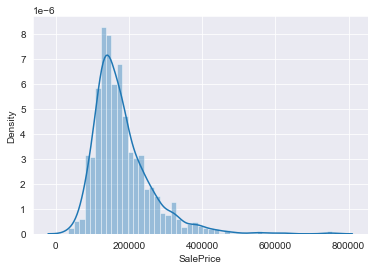

In [52]:
sns.distplot(y_train)
print("Skewness: {}".format(y_train.skew()))

In [53]:
y_train_transform = np.log(y_train)
y_train_transform

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1452, dtype: float64

## Xgboost Regressor

In [54]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
xgb = xgboost.XGBRegressor()

In [55]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01 , 0.05 , 0.1 , 0.15 , 0.2],
        'max_depth': [2, 5, 7, 10 , 15 , 20],
        'min_child_weight': [1, 2, 3,4 , 5 , 6],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'booster': ['gbtree', 'gblinear'],
        'n_estimators' : [ 500 , 900 , 1100 , 1500 , 2000 , 2500 , 3000],
        'objective': ['reg:squarederror']
    }

    xgb_model = xgboost.XGBRegressor()

    rsearch = RandomizedSearchCV(estimator = xgb_model,
                           param_distributions = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_root_mean_squared_error',  #RMSE
                           cv = 5,
                           n_iter = 100,
                           n_jobs = -1,
                           verbose = 3,
                           return_train_score = True,
                           random_state = 42)

    rsearch.fit(X_train,y_train)

    return rsearch.best_params_

In [87]:
hyperParameterTuning(X_train , y_train_transform)

In [55]:
xgb = xgboost.XGBRegressor(subsample= 0.5,
 objective= 'reg:squarederror',
 n_estimators=2000,
 min_child_weight=1,
 max_depth= 5,
 learning_rate= 0.01,
 colsample_bytree= 0.7,
 booster = 'gbtree')

In [56]:
#xgb.fit(X_train_new , y_train_new , early_stopping_rounds=5, eval_set=[(X_test_new, y_test_new)])
xgb.fit(X_train , y_train_transform)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
predictions = xgb.predict(X_test[cor_feature])
predictions = np.exp(predictions)

sub = pd.DataFrame(data =range(1461 , 2920) , columns = ['Id'])
sub['SalePrice'] = predictions

sub.to_csv('sub41' ,index = False)
sub.head()

In [ ]:
sns.distplot(np.exp(xgb.predict(X_train[cor_feature])) - y_train)

## Saving the model

In [ ]:
##saving the model
import pickle

file = open('xgboost_regression_model.pkl','wb')
pickle.dump(xgb , file)

In [57]:
#Validation function
from sklearn.model_selection import KFold , cross_val_score

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train_transform, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
rmsle_cv(xgb).mean()

### Hyperparameter Tuning with Random Forest

In [157]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [158]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [159]:
#model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_root_mean_squared_error', 
                               n_iter = 50, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs =-1)


In [160]:
rf_random.fit(X_train , y_train_transform)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [161]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=5,
                      n_estimators=1000)

## ElasticNet
Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.
Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training.

## L2 Penalty
One popular penalty is to penalize a model based on the sum of the squared coefficient values. This is called an L2 penalty. An L2 penalty minimizes the size of all coefficients, although it prevents any coefficients from being removed from the model.

l2_penalty = sum j=0 to p beta_j^2

## L1 Penalty
Another popular penalty is to penalize a model based on the sum of the absolute coefficient values. This is called the L1 penalty. An L1 penalty minimizes the size of all coefficients and allows some coefficients to be minimized to the value zero, which removes the predictor from the model.

l1_penalty = sum j=0 to p abs(beta_j)


## Note:
Confusingly, the alpha hyperparameter can be set via the “l1_ratio” argument that controls the contribution of the L1 and L2 penalties and the lambda hyperparameter can be set via the “alpha” argument that controls the contribution of the sum of both penalties to the loss function.

In [58]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV

def hyperParameterTuningElasticNet(X_train, y_train):
    param_tuning = {
        'alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
        'l1_ratio' : np.arange(0, 1, 0.01)
    }

    en_model = ElasticNet()

    rsearch = RandomizedSearchCV(estimator = en_model,
                           param_distributions = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_root_mean_squared_error',  #RMSE
                           cv = 5,
                           n_iter = 50,
                           n_jobs = -1,
                           verbose = 3,
                           return_train_score = True,
                           random_state = 42)

    rsearch.fit(X_train,y_train)

    return rsearch.best_params_

In [ ]:
hyperParameterTuningElasticNet(X_train , y_train_transform)

In [78]:
from sklearn.linear_model import ElasticNet

en_model = ElasticNet(l1_ratio=0.15 , alpha = 0.001)

en_model.fit(X_train , y_train_transform)

ElasticNet(alpha=0.001, l1_ratio=0.15)

In [ ]:
sns.distplot(np.exp(en_model.predict(X_train)) - y_train)

### Pipeline

In [79]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

enet = make_pipeline(RobustScaler() , en_model)
enet.fit(X_train , y_train_transform)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet', ElasticNet(alpha=0.001, l1_ratio=0.15))])

## Light GBM

LightGBM was described by Guolin Ke, et al. in the 2017 paper titled “LightGBM: A Highly Efficient Gradient Boosting Decision Tree.” The implementation introduces two key ideas: GOSS and EFB.

Gradient-based One-Side Sampling, or GOSS for short, is a modification to the gradient boosting method that focuses attention on those training examples that result in a larger gradient, in turn speeding up learning and reducing the computational complexity of the method.

Exclusive Feature Bundling, or EFB for short, is an approach for bundling sparse (mostly zero) mutually exclusive features, such as categorical variable inputs that have been one-hot encoded. As such, it is a type of automatic feature selection.

In [80]:
# check lightgbm version
import lightgbm
print(lightgbm.__version__)

3.2.1


In [81]:
lgbm = lightgbm.LGBMRegressor()

In [82]:
lgbm.fit(X_train , y_train_transform)

LGBMRegressor()

## Lasso


In [83]:
from  sklearn.linear_model import Lasso

for i in [0.001 , 0.005 , 0.01 , 0.1 ,0.5]:
    lasso = Lasso(alpha=i)
    val = rmsle_cv(lasso)
    print("alpha = {} ==> RMSE = {}".format(i , val.mean()))

alpha = 0.001 ==> RMSE = 0.11738352511555819
alpha = 0.005 ==> RMSE = 0.1334026235175493
alpha = 0.01 ==> RMSE = 0.14948769825389757
alpha = 0.1 ==> RMSE = 0.2228275009879445
alpha = 0.5 ==> RMSE = 0.37544816207651666


In [84]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train_transform)

Lasso(alpha=0.001)

### Pipeline

In [85]:
lasso_pipe = make_pipeline(RobustScaler() ,  lasso)
lasso_pipe.fit(X_train , y_train_transform)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.001))])

## Gradient Boosting 

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

def hyperParameterTuningGradientBoosting(X_train, y_train):
    param_tuning = {
        'n_estimators' : [ 32, 64, 100, 200 , 500 , 1000 , 1500 , 2000],
        'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
        'max_depth' : np.linspace(1, 32, 32, endpoint=True),
        'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features' : list(range(1,X_train.shape[1]))
    }

    gbr = GradientBoostingRegressor()

    rsearch = RandomizedSearchCV(estimator = gbr,
                           param_distributions = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_root_mean_squared_error',  #RMSE
                           cv = 5,
                           n_iter = 50,
                           n_jobs = -1,
                           verbose = 3,
                           return_train_score = True,
                           random_state = 42)

    rsearch.fit(X_train,y_train)

    return rsearch.best_params_

In [102]:
hyperParameterTuningGradientBoosting(X_train , y_train_transform)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 500,
 'min_samples_split': 0.7000000000000001,
 'min_samples_leaf': 0.1,
 'max_features': 69,
 'max_depth': 11.0,
 'learning_rate': 0.1}

In [87]:
gbr = GradientBoostingRegressor(
 n_estimators= 500,
 min_samples_split= 0.7,
 min_samples_leaf= 0.1,
 max_features=69,
 max_depth = 11.0,
 learning_rate= 0.1)

gbr.fit(X_train , y_train_transform)

GradientBoostingRegressor(max_depth=11.0, max_features=69, min_samples_leaf=0.1,
                          min_samples_split=0.7, n_estimators=500)

In [104]:
rmsle_cv(gbr).mean()

0.13792296530920264

## Catboost

In [69]:
import catboost as cb

In [88]:
import catboost as cb
from sklearn.model_selection import RandomizedSearchCV

def hyperParameterTuningCatboost(X_train, y_train):
    param_tuning = {
        'iterations': [100, 150, 200],
        'learning_rate': [ 0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]
    }

    cboost = cb.CatBoostRegressor(loss_function='RMSE')

    rsearch = RandomizedSearchCV(estimator = cboost,
                           param_distributions = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_root_mean_squared_error',  #RMSE
                           cv = 5,
                           n_iter = 50,
                           n_jobs = -1,
                           verbose = 2,
                           return_train_score = True,
                           random_state = 42)

    rsearch.fit(X_train,y_train)

    return rsearch.best_params_

In [70]:
hyperParameterTuningCatboost(X_train , y_train_transform)

In [89]:
cboost = cb.CatBoostRegressor(learning_rate= 0.1 , 
                             l2_leaf_reg=3 , 
                             iterations = 200 , 
                             depth = 4,
                             verbose = 0)

cboost.fit(X_train , y_train_transform)

## Model Report

In [90]:
all_models = {'Random Forest':RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=5,
                      n_estimators=1000) , 
          'XGBooost Regressor':xgb ,
          'LightGBM' : lgbm ,  
          'Elastic Net' : enet , 
          'Lasso':lasso_pipe , 
          'Gradient Boosting Regressor' : gbr ,
          'CatBoost': cboost }

model_results = {}

for model in all_models:
    model_results[model] = rmsle_cv(all_models[model]).mean()
    

In [105]:
model_df = pd.DataFrame(index = [i for i in model_results] , data = [model_results[i] for i in model_results] , columns = ['RMSE'])
model_df.sort_values(by = 'RMSE' ,inplace=True)
model_df

,RMSE
Elastic Net,0.114031
Lasso,0.115032
XGBooost Regressor,0.116523
CatBoost,0.117930
LightGBM,0.127415
Random Forest,0.136823
Gradient Boosting Regressor,0.137946


<AxesSubplot:>

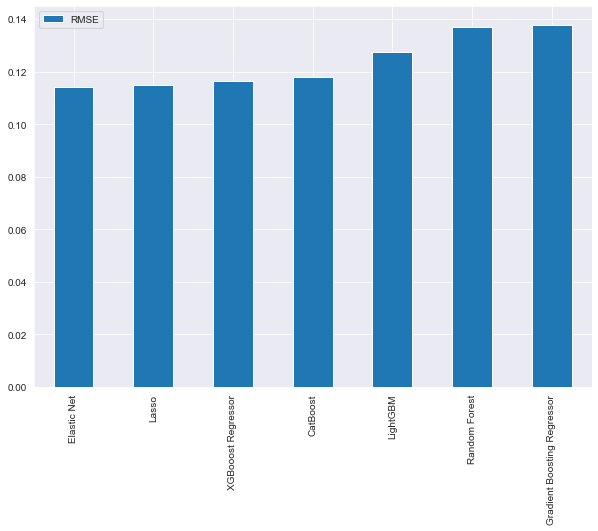

In [106]:
model_df.plot(kind = 'bar' , figsize =  (10 ,7))

## Stacked  Regressor

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor ,RandomForestRegressor

## base models
level0 = [
    ('rf' ,RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=5,
                      n_estimators=1000)),
    ('xgboost' , xgb),
    ('lgbm' , lgbm),
    ('enet' ,  enet),
    ('lasso' , lasso_pipe),
    ('gbr' , gbr),
    ('cboost' , cboost)
]

## meta model - Elastic Net
level1 = enet

stacked_model = StackingRegressor(estimators = level0 , final_estimator=level1 , cv =5)
stacked_model.fit(X_train  , y_train_transform)

C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because 

StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(max_depth=15,
                                                     max_features='sqrt',
                                                     min_samples_split=5,
                                                     n_estimators=1000)),
                              ('xgboost',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.7, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.01,
                                            max_delta_s...
                               Pipeline(steps=[('rob

In [84]:
### Submission

pred_stacked = stacked_model.predict(X_test)
pred_stacked = np.exp(pred_stacked)

sub = pd.DataFrame(data =range(1461 , 2920) , columns = ['Id'])
sub['SalePrice'] = pred_stacked

sub.to_csv('sub11' ,index = False)
sub.head()

C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,Id,SalePrice
0,1461,117856.761304
1,1462,155975.997600
2,1463,185567.472320
3,1464,193706.141942
4,1465,195397.107132


In [86]:
##saving the model
import pickle

file = open('stacked_regression_model.pkl','wb')
pickle.dump(stacked_model , file)


In [71]:
# import pickle


# filename = 'stacked_regression_model.pkl'
# stacked_model = pickle.load(open(filename, 'rb'))

In [103]:
## Evaluating the model

stacked_score = rmsle_cv(stacked_model).mean()

model_df = pd.concat([model_df , pd.DataFrame(index = ['Stacked Regressor'] , columns = ['RMSE'] , data = stacked_score)] , axis = 0)
model_df.sort_values(by = 'RMSE' , inplace=True)
model_df 

,RMSE
Stacked Regressor,0.110772
Elastic Net,0.114031
Lasso,0.115032
XGBooost Regressor,0.116523
CatBoost,0.117930
LightGBM,0.127415
Random Forest,0.136823
Gradient Boosting Regressor,0.137946


<AxesSubplot:>

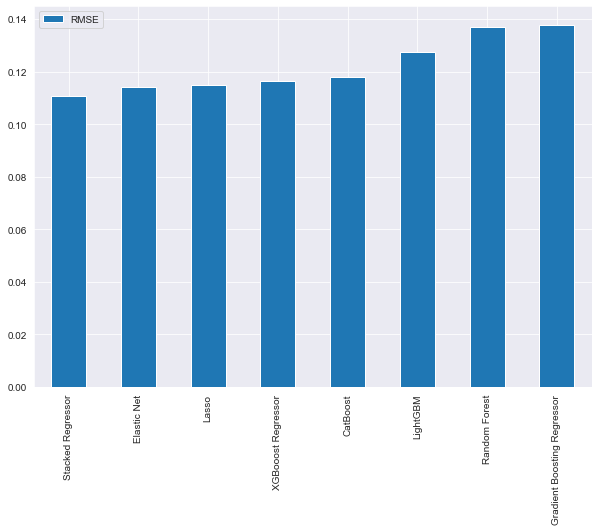

In [104]:
model_df.plot(kind = 'bar' , figsize =  (10 ,7))